In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
no_fund = np.load("./logs/DDPG_no_fund.npy")[:,:10]
no_fund.shape
fund = np.load("./logs/DDPG_fund.npy")

In [3]:
steps = np.array(range(10)) * 11000
steps

array([    0, 11000, 22000, 33000, 44000, 55000, 66000, 77000, 88000,
       99000])

In [4]:
x = steps
mean = fund.mean(axis=0)
std = fund.std(axis=0)
mean_n = no_fund.mean(axis=0)
std_n = no_fund.std(axis=0)

Text(0, 0.5, 'final value')

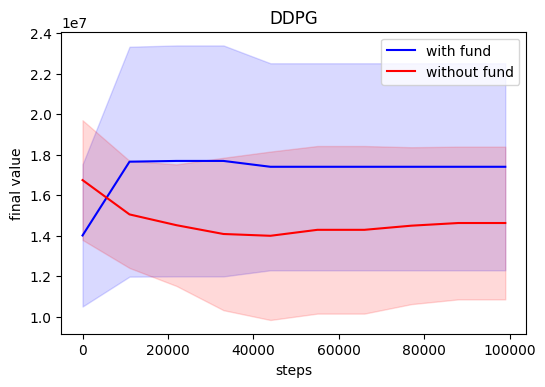

In [9]:
fig, ax = plt.subplots()
fig.set_dpi(100.0)
ax.set_title("DDPG")
ax.plot(x, mean, '-', color='blue', label='with fund')
ax.plot(x, mean_n, '-', color='red', label='without fund')
ax.legend()
ax.fill_between(x, mean-std, mean+std, alpha=0.15, color='blue')
ax.fill_between(x, mean_n-std_n, mean_n+std_n, alpha=0.15, color='red')
ax.set_xlabel("steps")
ax.set_ylabel("final value")

In [3]:
no_fund = np.load("./logs/SAC_no_fund.npy")
no_fund.shape

(5, 10)

In [18]:
no_fund

array([[10203023.09048788, 18054406.72470095, 18054406.72470095,
        16689677.40904884, 19565734.93645473, 19565734.93645473,
        19565734.93645473, 19565734.93645473, 19565734.93645473,
        19565734.93645473],
       [19018163.29867949, 22181410.07333535, 22181410.07333535,
        20664012.64768645, 20664012.64768645, 20664012.64768645,
        20664012.64768645, 20664012.64768645, 20664012.64768645,
        20664012.64768645],
       [12652958.47885271, 18553388.66027416, 18553388.66027416,
        17875639.52149178, 17875639.52149178, 17875639.52149178,
        17875639.52149178, 17875639.52149178, 17875639.52149178,
        17875639.52149178],
       [12108030.94805608, 21433234.10878859, 21433234.10878859,
        23318845.14780543, 23318845.14780543, 23318845.14780543,
        23318845.14780543, 23318845.14780543, 23318845.14780543,
        23318845.14780543],
       [13460643.43547907, 15385306.98868664, 15385306.98868664,
        15385306.98868664, 14511228.1502702

In [4]:
dl = os.listdir("./logs/SAC/")

In [5]:
df = pd.read_csv(f"./logs/SAC/{dl[0]}/evaluator.csv").drop(
    columns=[col+'_score' for col in ['std', 'min', 'max']])
for path in dl[1:]:
    x = pd.read_csv(f"./logs/SAC/{path}/evaluator.csv").drop(
        columns=[col+'_score' for col in ['std', 'min', 'max']])
    df = pd.merge(df, x, on='total_steps')
df

/home/henry/miniconda3/envs/finrl/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'mean_score_x'} in the result is deprecated and will raise a MergeError in a future version.
  


,mean_score_x,total_steps,mean_score_y,mean_score_x,mean_score_y,mean_score
0,9.179906e+06,0,1.040100e+07,1.797108e+07,1.703745e+07,1.578389e+07
1,1.805973e+07,11000,1.656077e+07,1.470199e+07,1.642713e+07,1.601814e+07
2,1.805973e+07,22000,1.656077e+07,1.470199e+07,1.642713e+07,1.601814e+07
3,1.805973e+07,33000,1.656077e+07,1.470199e+07,1.278411e+07,1.675311e+07
4,1.805973e+07,44000,1.971447e+07,1.724718e+07,1.278411e+07,1.602046e+07
5,1.578503e+07,55000,1.971447e+07,1.724718e+07,1.278411e+07,1.602046e+07
6,1.722603e+07,66000,1.951799e+07,1.724718e+07,1.278411e+07,1.602046e+07
7,1.722603e+07,77000,1.951799e+07,1.623959e+07,1.278411e+07,1.602046e+07
8,1.722603e+07,88000,1.951799e+07,1.623959e+07,1.278411e+07,1.602046e+07
9,1.722603e+07,99000,1.951799e+07,1.623959e+07,1.278411e+07,1.602046e+07


In [6]:
data = df.drop(columns=['total_steps']).to_numpy()
data.shape

(10, 5)

In [14]:
x = np.array(df.total_steps)
x

array([    0, 11000, 22000, 33000, 44000, 55000, 66000, 77000, 88000,
       99000])

In [15]:
mean = data.mean(axis=1)
std = data.std(axis=1)
mean_n = no_fund.mean(axis=0)
std_n = no_fund.std(axis=0)

Text(0, 0.5, 'final value')

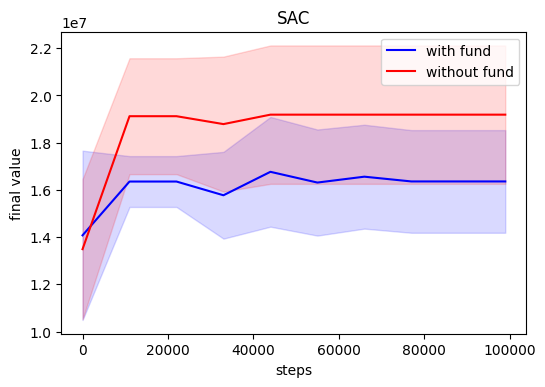

In [17]:
fig, ax = plt.subplots()
fig.set_dpi(100.0)
ax.set_title("SAC")
ax.plot(x, mean, '-', color='blue', label='with fund')
ax.plot(x, mean_n, '-', color='red', label='without fund')
ax.legend()
ax.fill_between(x, mean-std, mean+std, alpha=0.15, color='blue')
ax.fill_between(x, mean_n-std_n, mean_n+std_n, alpha=0.15, color='red')
ax.set_xlabel("steps")
ax.set_ylabel("final value")